In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [117]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [118]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [119]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [120]:
df.shape

(545, 13)

In [121]:
df1 = df.drop(['mainroad','hotwaterheating'], axis="columns")
df1['price_per_sqft'] = df1['price']/df1['area']
df1.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft
0,13300000,7420,4,2,3,no,no,yes,2,yes,furnished,1792.452830
1,12250000,8960,4,4,4,no,no,yes,3,no,furnished,1367.187500
2,12250000,9960,3,2,2,no,yes,no,2,yes,semi-furnished,1229.919679
3,12215000,7500,4,2,2,no,yes,yes,3,yes,furnished,1628.666667
4,11410000,7420,4,1,2,yes,yes,yes,2,no,furnished,1537.735849


C:\Users\UBER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

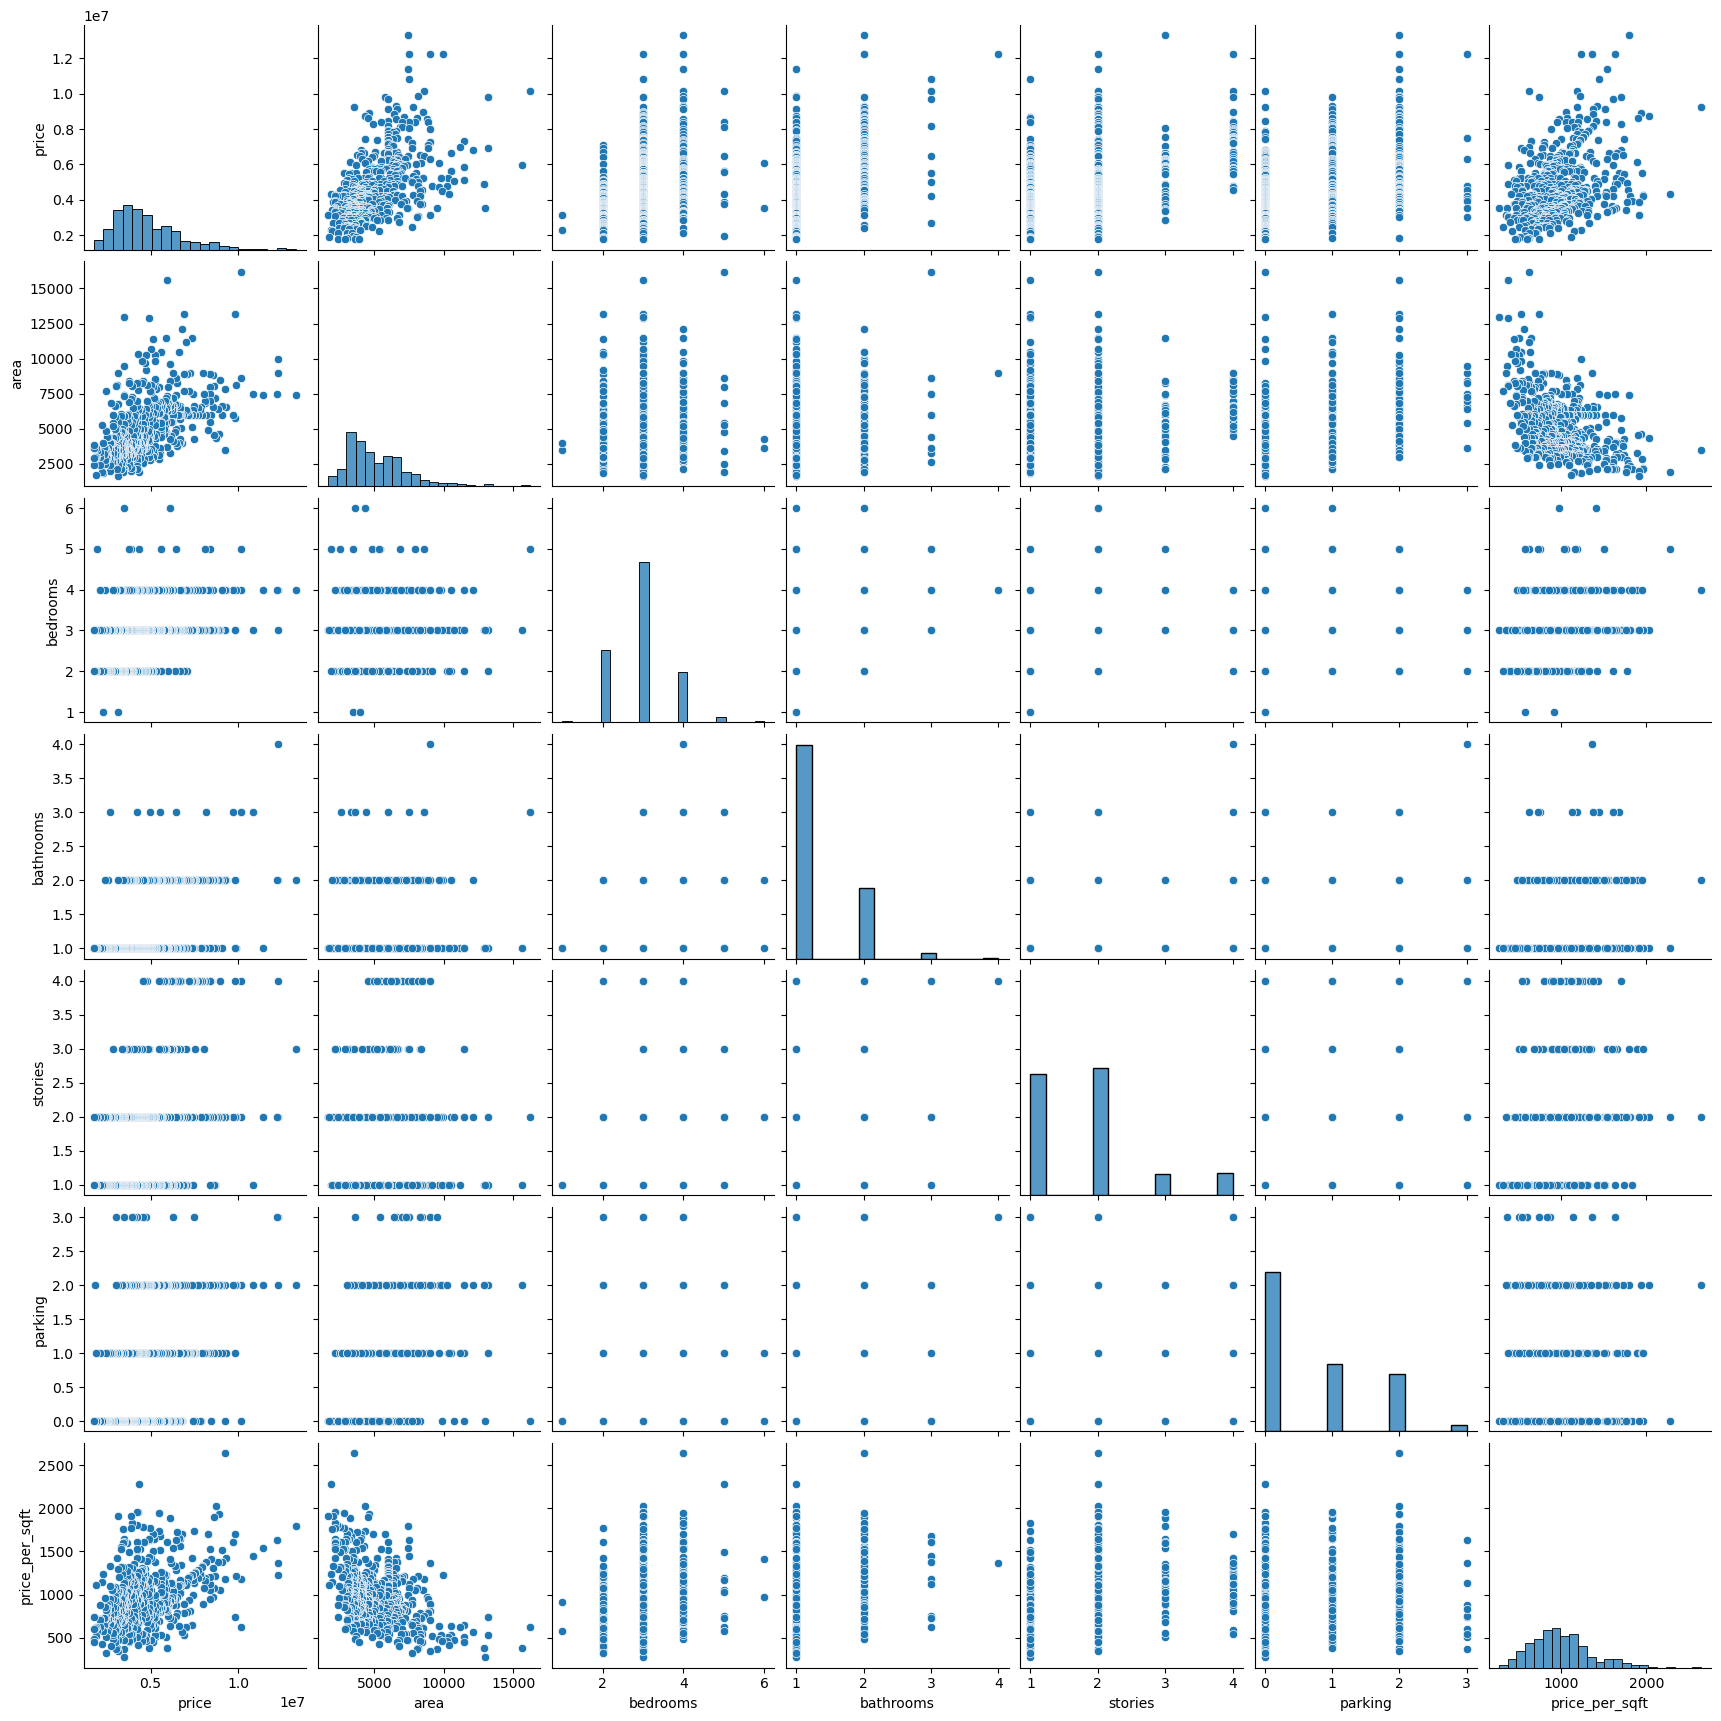

In [91]:
plt.figure(figsize=(10,8))
sns.pairplot(df1)
plt.show()

In [122]:
df2 = df1.replace({
    'yes': 1,
    'no': 0
})
df2.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft
0,13300000,7420,4,2,3,0,0,1,2,1,furnished,1792.452830
1,12250000,8960,4,4,4,0,0,1,3,0,furnished,1367.187500
2,12250000,9960,3,2,2,0,1,0,2,1,semi-furnished,1229.919679
3,12215000,7500,4,2,2,0,1,1,3,1,furnished,1628.666667
4,11410000,7420,4,1,2,1,1,1,2,0,furnished,1537.735849


In [123]:
df2.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

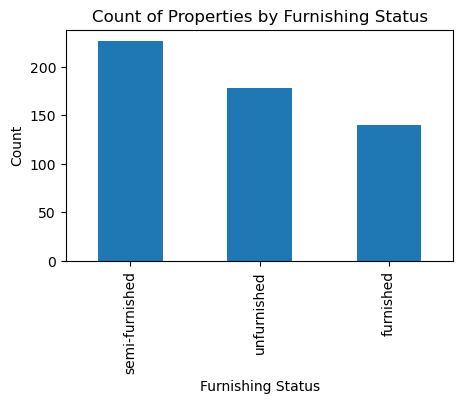

In [124]:
plt.figure(figsize=(5,3))
df2['furnishingstatus'].value_counts().plot(kind='bar')
plt.title('Count of Properties by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.show()

### converting categorial features into one hot encoding using get.dummies

In [186]:
df3=pd.get_dummies(df2,drop_first=True)
df3.head().astype(int) 

,price,area,bedrooms,bathrooms,stories,guestroom,basement,airconditioning,parking,prefarea,price_per_sqft,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,0,0,1,2,1,1792,0,0
1,12250000,8960,4,4,4,0,0,1,3,0,1367,0,0
2,12250000,9960,3,2,2,0,1,0,2,1,1229,1,0
3,12215000,7500,4,2,2,0,1,1,3,1,1628,0,0
4,11410000,7420,4,1,2,1,1,1,2,0,1537,0,0


Text(0.5, 1.0, 'Correlation Matrix')

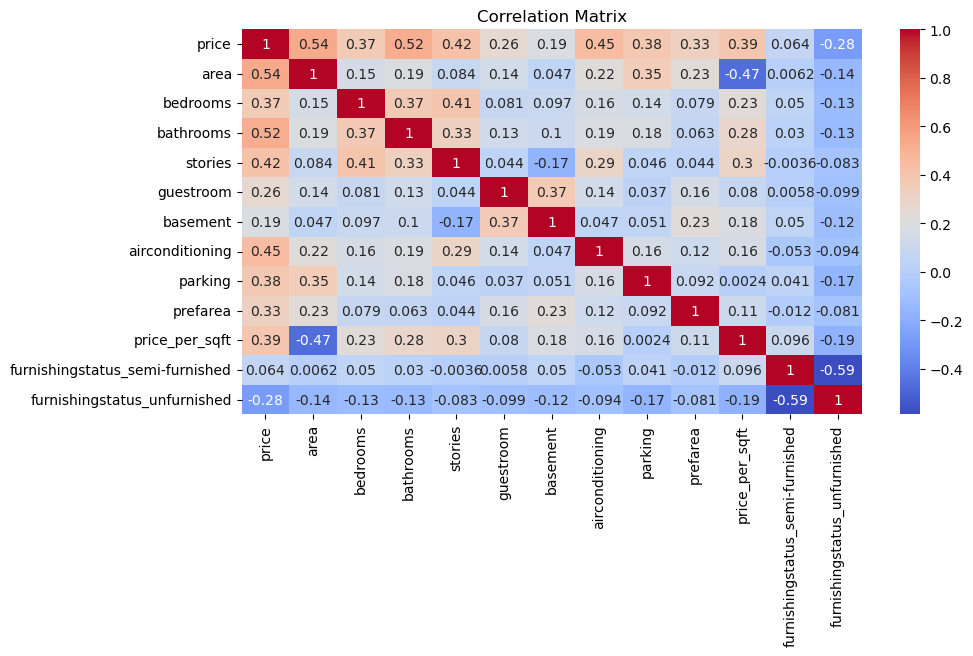

In [187]:
plt.figure(figsize=(10,5))
g=sns.heatmap(df3.corr(),annot=True,cmap="coolwarm",)
plt.title('Correlation Matrix')

In [188]:
# Calculate the quartiles for price
Q1 = df3['price'].quantile(0.25)
Q3 = df3['price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Remove outliers
df3 = df3[(df3['price'] >= lower_bound) & (df3['price'] <= upper_bound)]

In [189]:
# Calculate the quartiles for area
Q1 = df3['area'].quantile(0.25)
Q3 = df3['area'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Remove outliers
df3 = df3[(df3['area'] >= lower_bound) & (df3['area'] <= upper_bound)]

In [190]:
df3.shape

(517, 13)

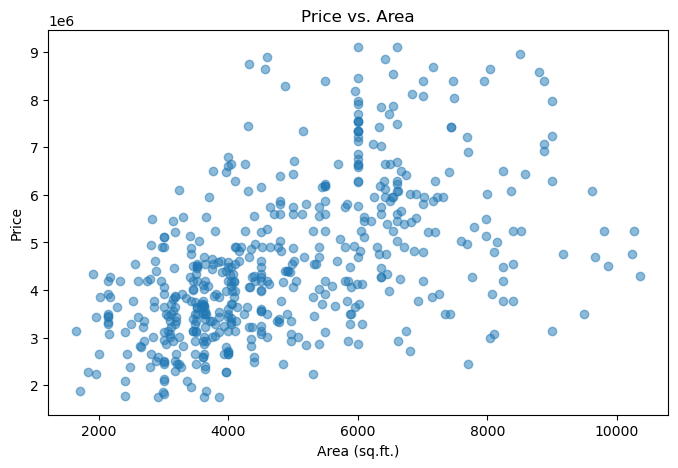

In [191]:
plt.figure(figsize=(8,5))
plt.scatter(df3['area'], df3['price'], alpha=0.5)
plt.title('Price vs. Area')
plt.xlabel('Area (sq.ft.)')
plt.ylabel('Price')
plt.show()

### model building

In [192]:
X = df3.drop('price',axis='columns')

In [193]:
y = df3.price

In [194]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
X_train.shape

(413, 12)

In [195]:
X_train.shape

(413, 12)

In [196]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [197]:
model.score(X_test,y_test)

0.8538957266191264

In [198]:
prediction=model.predict(X_test)
prediction

array([3975818.18099072, 3393754.99691127, 1712117.10490821,
       5166216.43841361, 4854653.19063935, 5493266.19646656,
       3428561.54805504, 6935158.05624893, 5483453.22484848,
       4352432.5503505 , 4353223.72588652, 3499387.08879656,
       7335032.84236945, 4558636.72556699, 3919430.92191055,
       3059670.20389835, 4637185.24130188, 4558029.65018952,
       5715826.96908974, 3573028.91008412, 4464472.40391103,
       3563182.90361769, 7382756.78535987, 4723979.21369773,
       3635139.32948331, 4720360.79671948, 4141610.9238876 ,
       4586587.22643455, 5399215.21437447, 6328159.33461165,
       3908598.50899872, 5254310.8522578 , 2774662.67555871,
       3676995.70685741, 5489976.75325057, 3231075.7479436 ,
       4530970.0920553 , 3331167.73484917, 3849258.19280466,
       3305977.74277331, 4099851.80861855, 1877513.72877715,
       4970423.87335222, 3218786.82318078, 4475525.38013742,
       2897893.50479607, 2901893.87683983, 4085540.52018299,
       3770548.77173531,

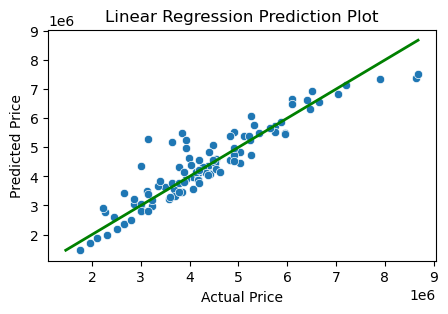

In [199]:
# Create a scatter plot
plt.figure(figsize=(5,3))
sns.scatterplot(x=y_test, y=prediction)

# Add a diagonal line for reference
min_val = min(min(y_test), min(prediction))
max_val = max(max(y_test), max(prediction))
plt.plot([min_val, max_val], [min_val, max_val],color='green', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression Prediction Plot')
plt.show()

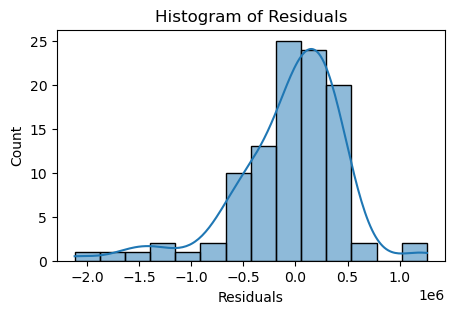

In [200]:
residuals = y_test - prediction

plt.figure(figsize=(5,3))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals')
plt.show()

### Accuracy score using different metrics

In [201]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, prediction)
rmse = mse ** 0.5
r2 = r2_score(y_test, prediction)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 268176804062.87
Root Mean Squared Error: 517857.90
R-squared: 0.85
